<a href="https://colab.research.google.com/github/avney/Wine_Quality_prediction/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Small_Projects/wine Quality prediction/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
df.drop("Id",axis=1, inplace=True)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.shape

(1143, 12)

In [ ]:
for col in df.columns:
  if df[col].isnull().sum():
    df[col].fillna(df[col].mean(), inplace = True)

In [ ]:
df.nunique()

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

In [ ]:
df.duplicated().sum()

125

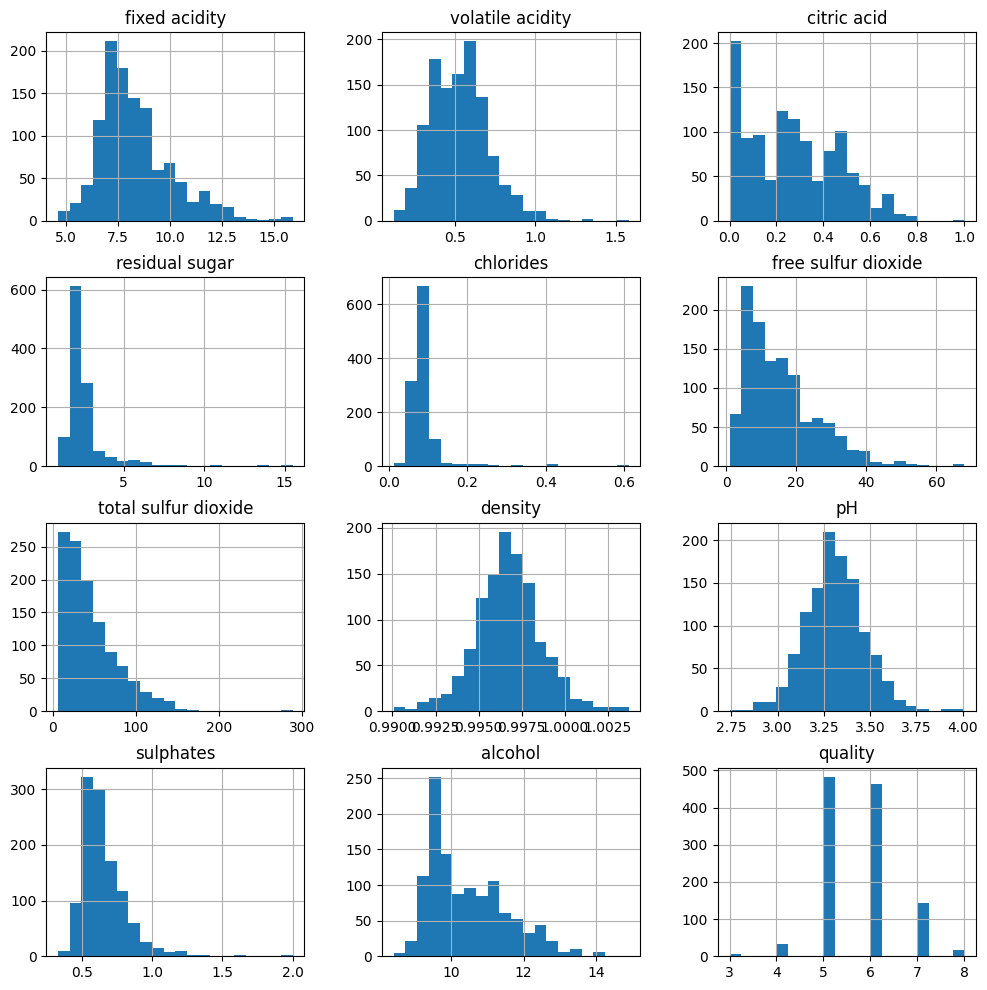

In [ ]:
df.hist(bins=20, figsize=(12,12))
plt.show()

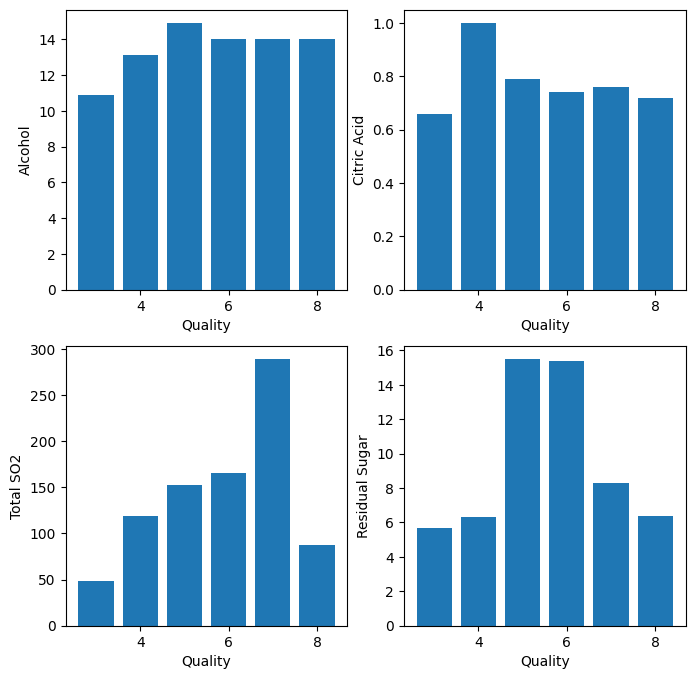

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')

plt.subplot(2,2,2)
plt.bar(df['quality'],df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')

plt.subplot(2,2,3)
plt.bar(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total SO2')

plt.subplot(2,2,4)
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

M1

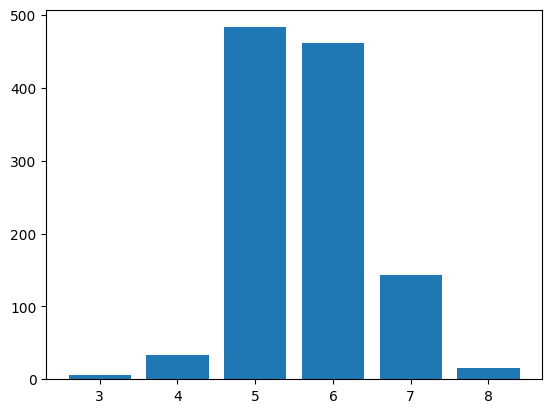

In [ ]:
diff_quality =df['quality'].unique()
repeat_diff_quality = df['quality'].value_counts()
plt.bar(diff_quality,repeat_diff_quality)
plt.show()

M2

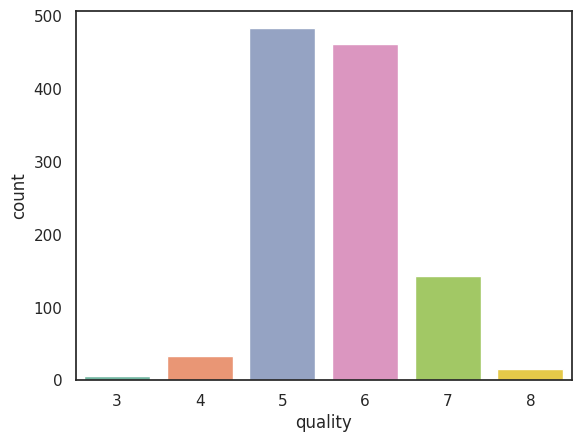

In [ ]:
sns.set(style='white')
sns.countplot(x='quality',data=df, palette='Set2') #more palettes are muted, pastel
plt.show()

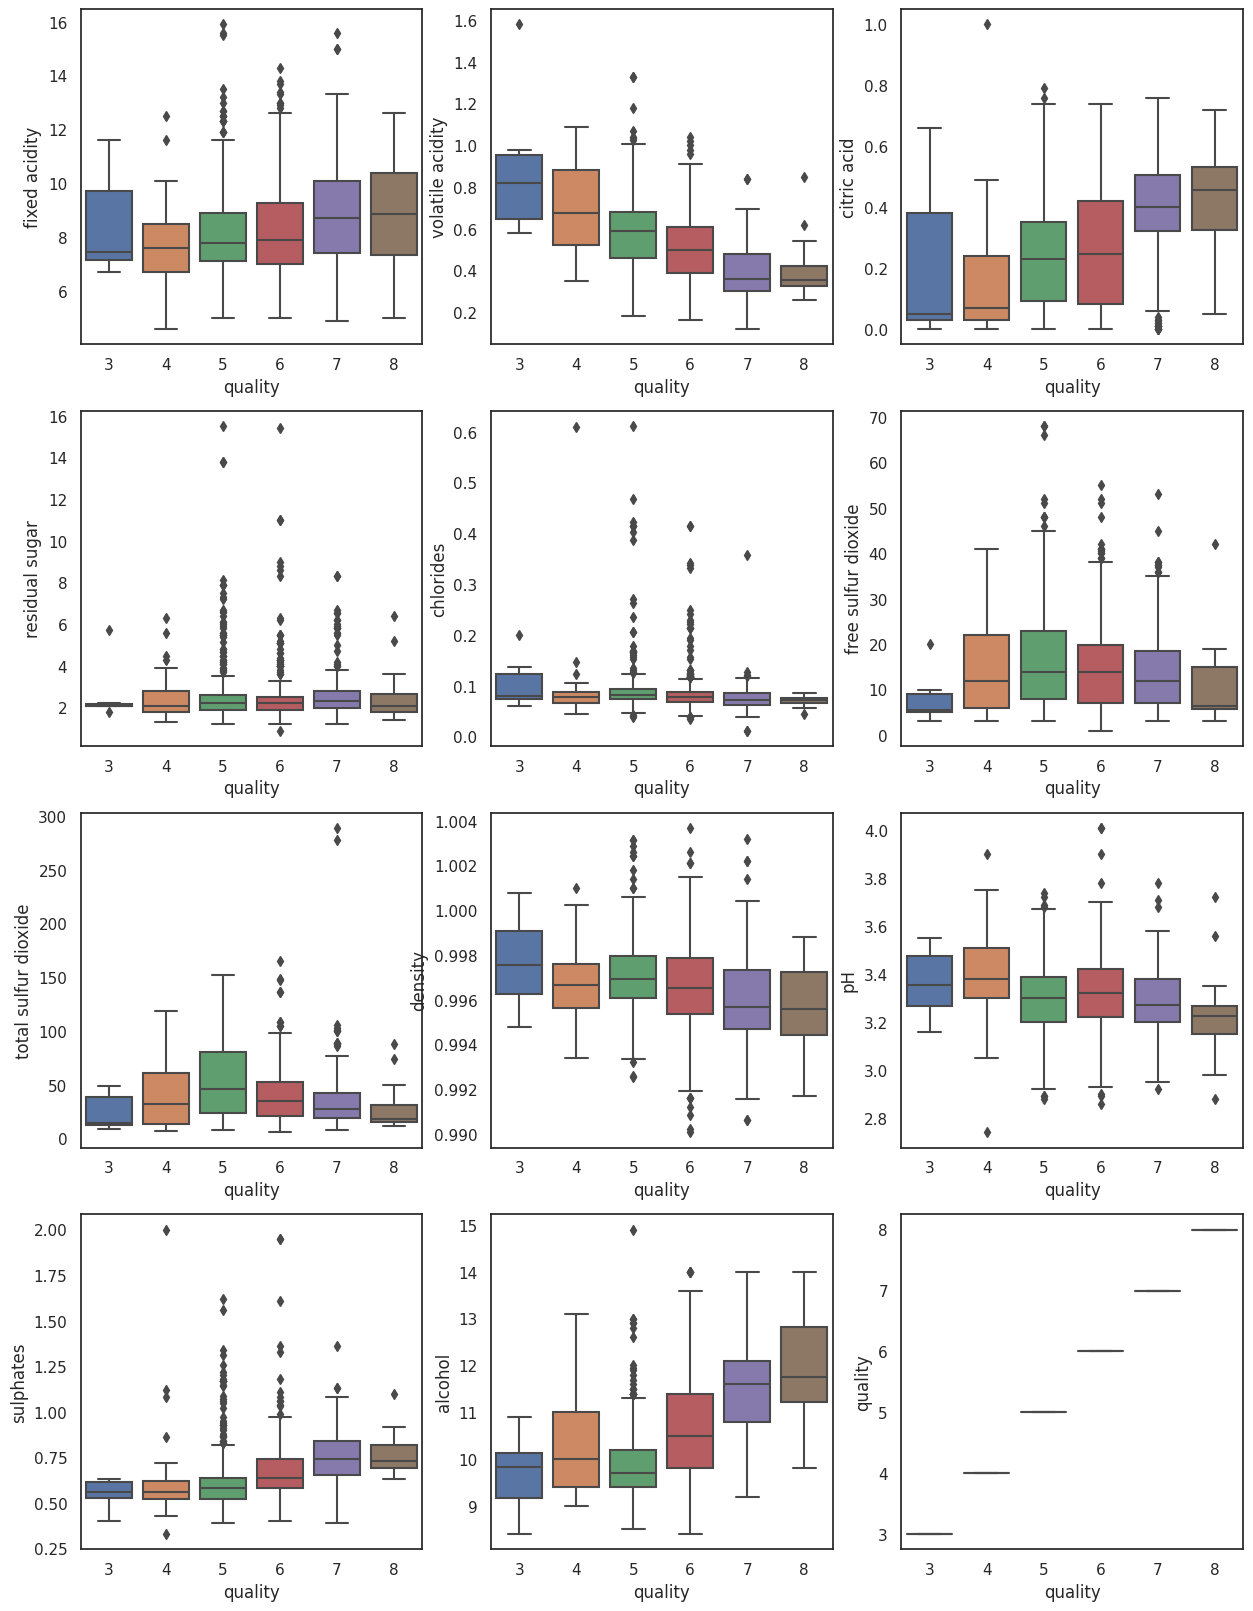

In [ ]:
fig,ax=plt.subplots(4,3,figsize=(15,20))
k=0
for i in range(4):
  for j in range(3):
    sns.boxplot(x='quality',y=df.columns[k],data=df,ax=ax[i][j])
    k+=1

<Axes: >

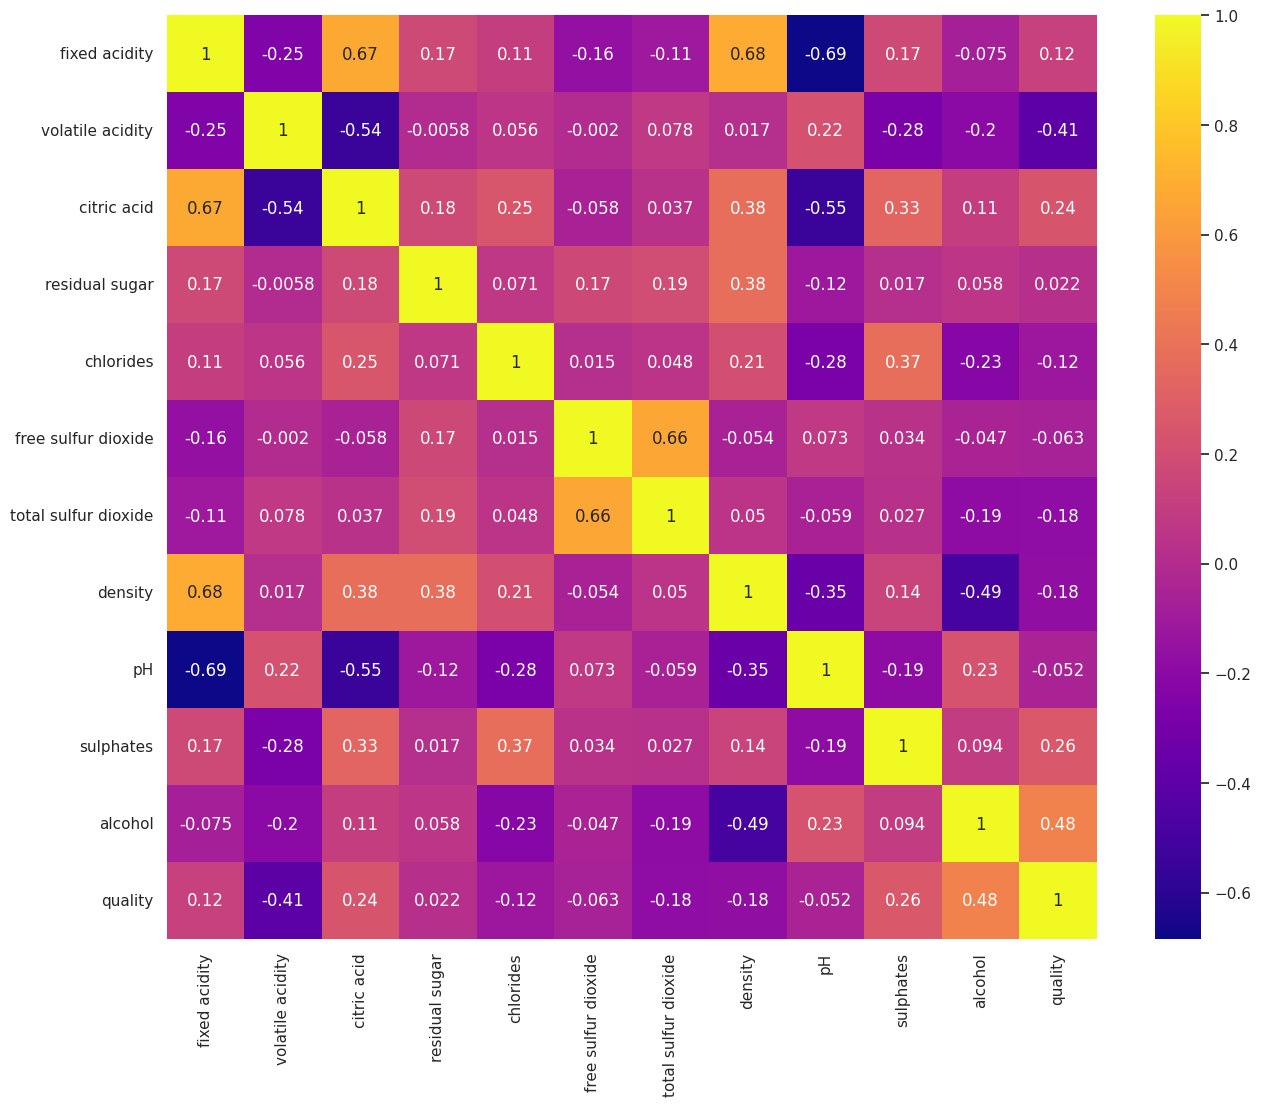

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

<Axes: >

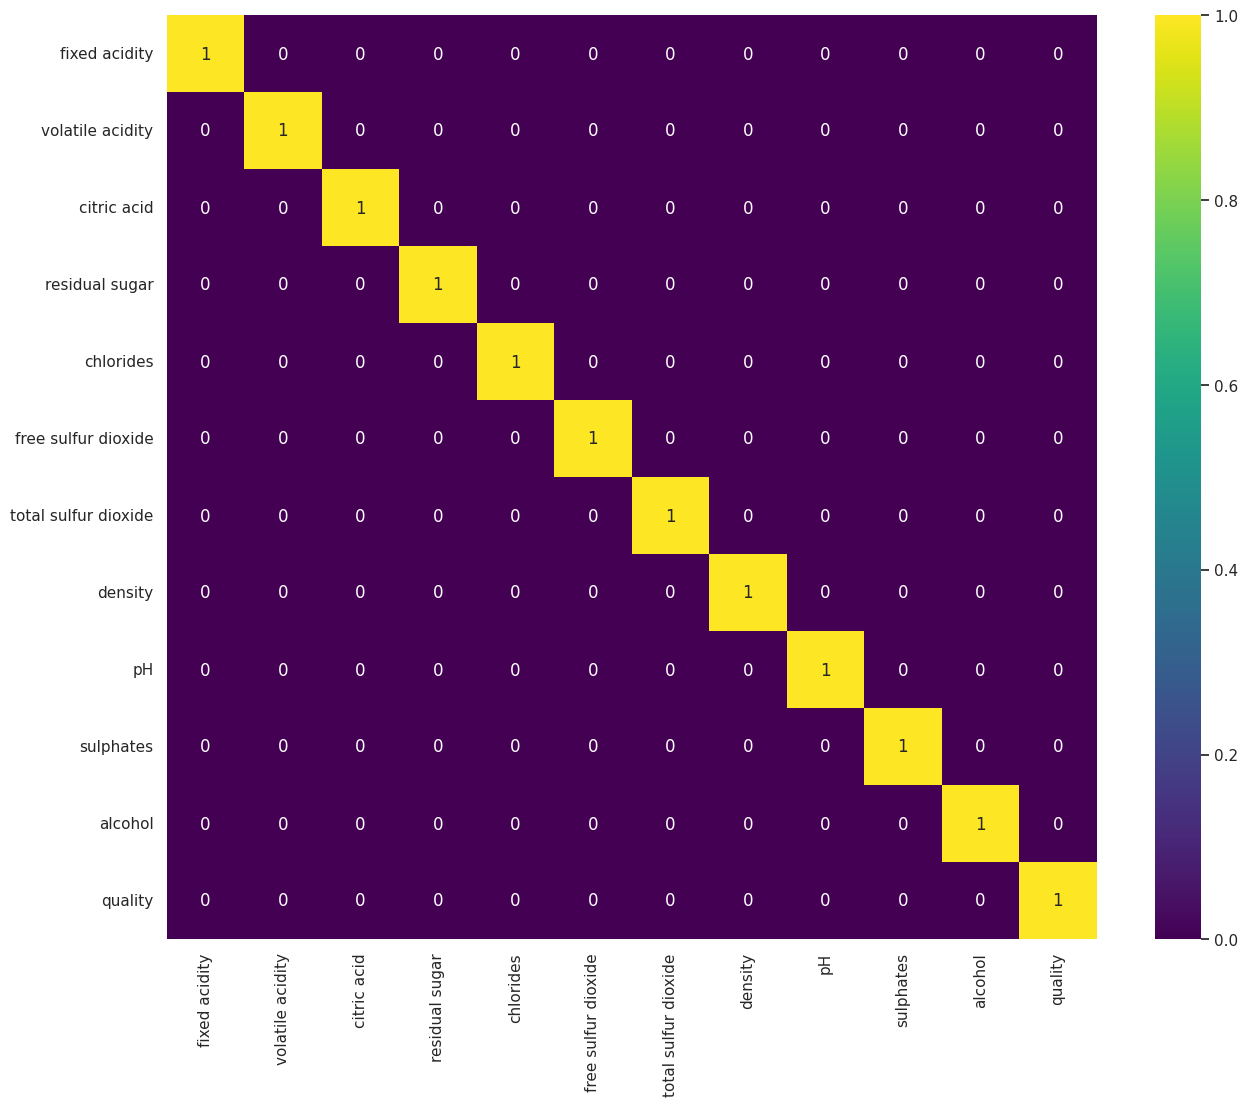

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr()>0.7,annot=True,cmap='viridis')

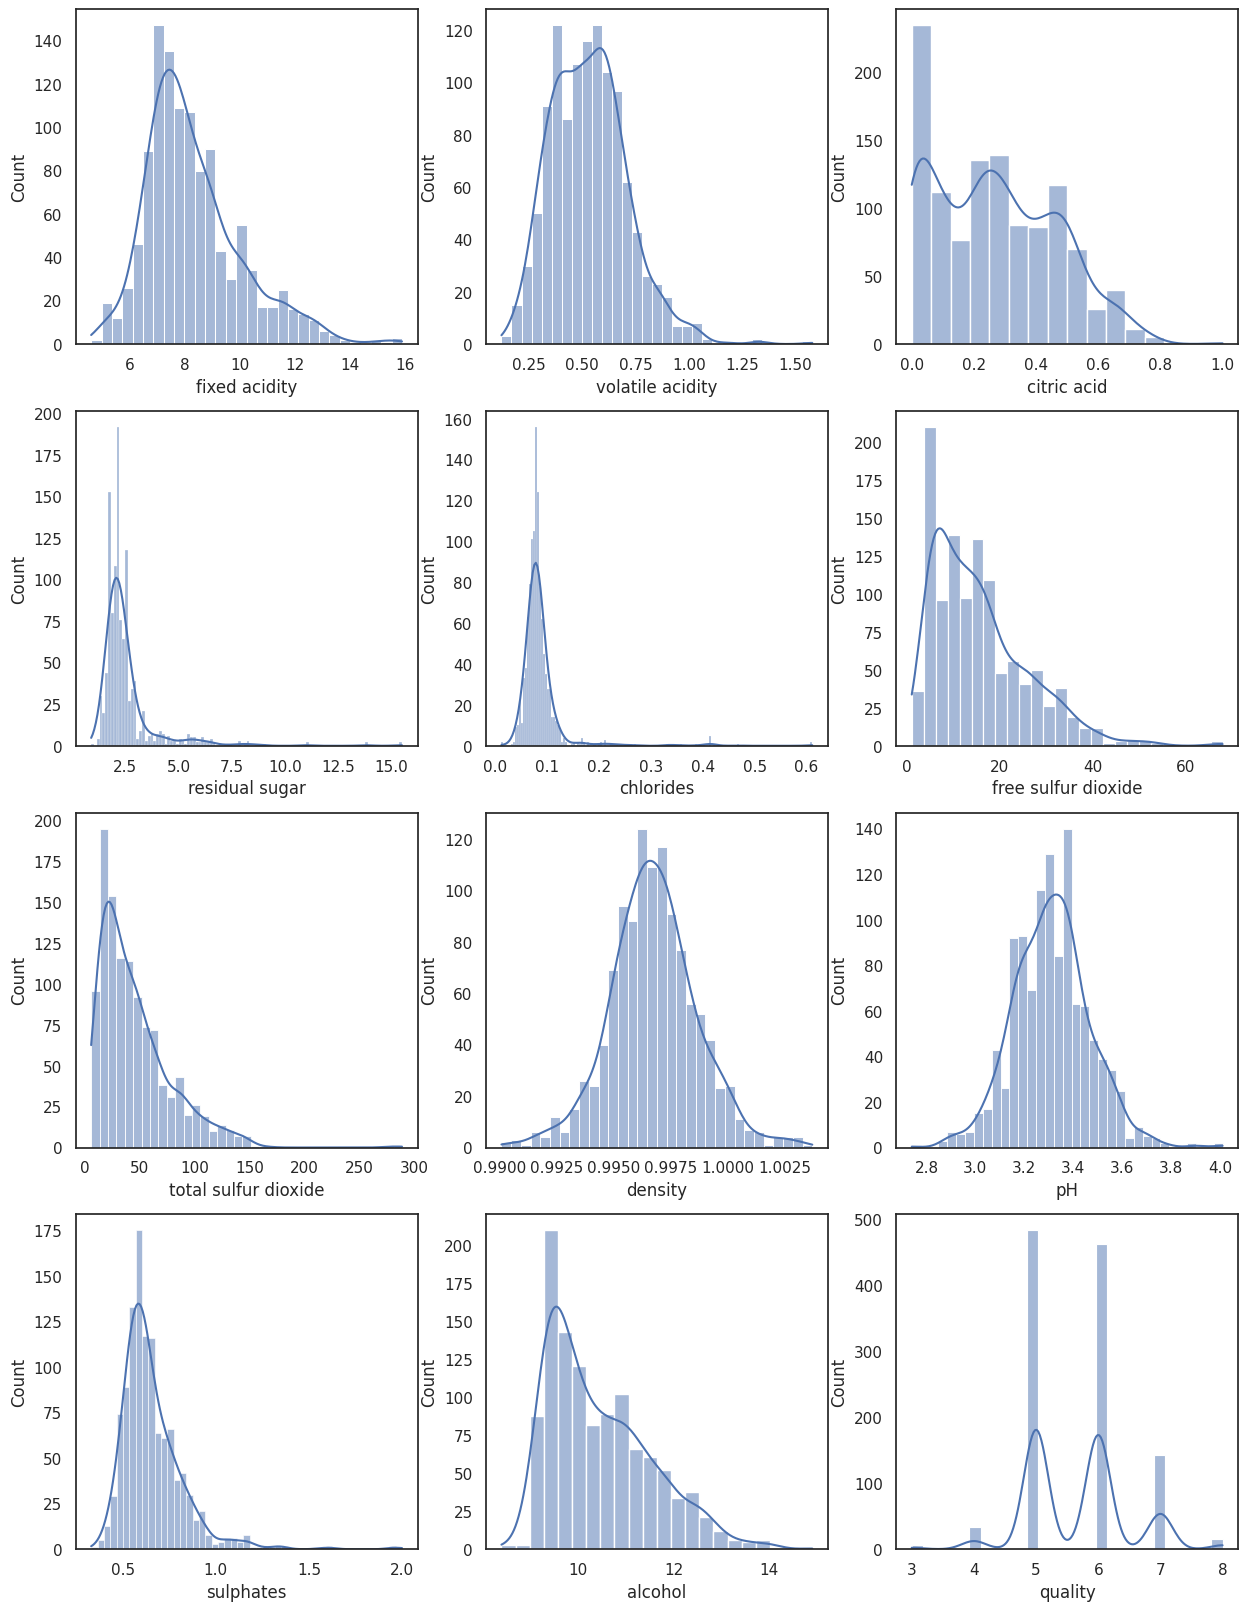

In [ ]:
fig,ax=plt.subplots(4,3,figsize=(15,20))
k=0
for i in range(4):
  for j in range(3):
    sns.histplot(df[df.columns[k]],ax=ax[i][j],kde=True)
    k+=1

In [ ]:
#columns_to_transform = ['citric acid','alcohol','volatile acidity' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

#for column in columns_to_transform:
#   df[column] = df[column].apply(np.log)

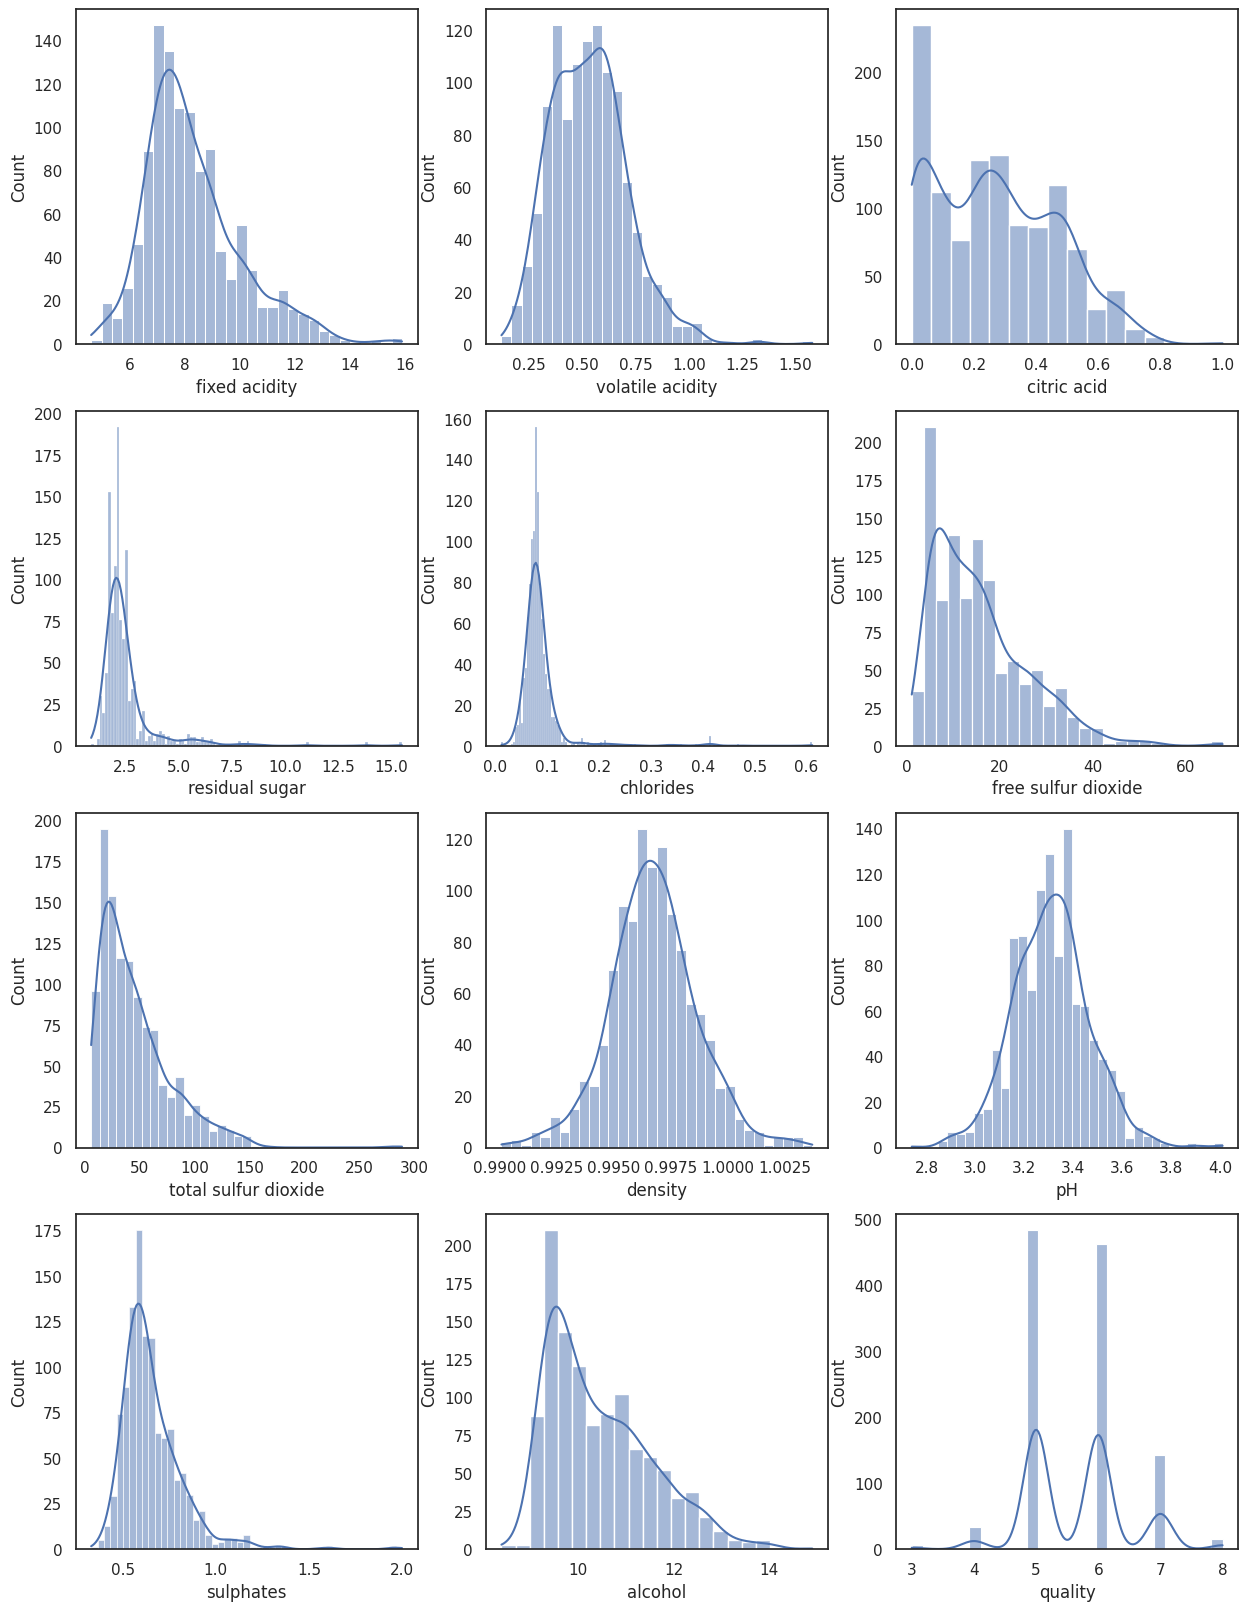

In [ ]:
fig,ax=plt.subplots(4,3,figsize=(15,20))
k=0
for i in range(4):
  for j in range(3):
    sns.histplot(df[df.columns[k]],ax=ax[i][j],kde=True)
    k+=1

In [ ]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
df_3=df[df.quality==3]
df_4=df[df.quality==4]
df_5=df[df.quality==5]
df_6=df[df.quality==6]
df_7=df[df.quality==7]
df_8=df[df.quality==8]

In [ ]:
df_3_400 = resample(df_3,n_samples=400,replace=True,random_state=12)
df_3_400.reset_index(drop=True,inplace=True)
df_4_400 = resample(df_4,n_samples=400,replace=True,random_state=12)
df_4_400.reset_index(drop=True,inplace=True)
df_7_400 = resample(df_7,n_samples=400,replace=True,random_state=12)
df_7_400.reset_index(drop=True,inplace=True)
df_8_400 = resample(df_8,n_samples=400,replace=True,random_state=12)
df_8_400.reset_index(drop=True,inplace=True)

In [ ]:
df_5_400=df_5.sample(400, random_state=12)
df_5_400.reset_index(drop=True,inplace=True)
df_6_400=df_6.sample(400, random_state=12)
df_6_400.reset_index(drop=True,inplace=True)

In [ ]:
df_400_each = pd.concat([df_3_400,df_4_400,df_5_400,df_6_400,df_7_400,df_8_400], axis=0)
df_400_each.quality.value_counts()

3    400
4    400
5    400
6    400
7    400
8    400
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

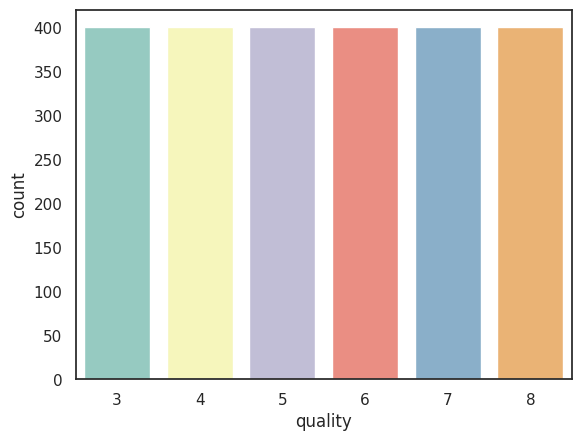

In [ ]:
sns.countplot(x='quality',data=df_400_each,palette='Set3')

<Axes: xlabel='quality', ylabel='alcohol'>

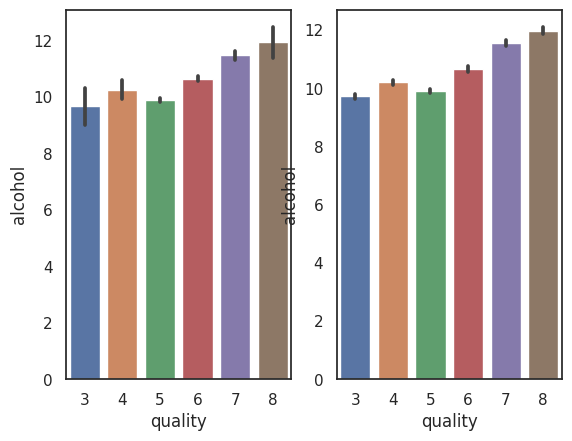

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='quality', y = 'alcohol', data = df)

plt.subplot(1,2,2)
sns.barplot(x='quality', y = 'alcohol', data = df_400_each)

In [ ]:
df_400_each.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
X = df_400_each[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df_400_each.quality

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [ ]:
for x in [2,4,6,8,10]:
  model = KNeighborsClassifier(x)
  model.fit(X_train,y_train)
  result = model.score(X_test,y_test)
  print("For n_neighbors =",x,",Score without using weight is",result)

For n_neighbors = 2 ,Score without using weight is 0.8133333333333334
For n_neighbors = 4 ,Score without using weight is 0.7866666666666666
For n_neighbors = 6 ,Score without using weight is 0.7516666666666667
For n_neighbors = 8 ,Score without using weight is 0.725
For n_neighbors = 10 ,Score without using weight is 0.7183333333333334


In [ ]:
for x in [2,4,6,8,10]:
  model = KNeighborsClassifier(x,weights='distance')
  model.fit(X_train,y_train)
  result_weight = model.score(X_test,y_test)
  print("For n_neighbors =",x,",Score with use of weight is",result_weight)

For n_neighbors = 2 ,Score with use of weight is 0.845
For n_neighbors = 4 ,Score with use of weight is 0.825
For n_neighbors = 6 ,Score with use of weight is 0.8266666666666667
For n_neighbors = 8 ,Score with use of weight is 0.8133333333333334
For n_neighbors = 10 ,Score with use of weight is 0.805


In [ ]:
final_model = KNeighborsClassifier(n_neighbors=2,weights='distance')
final_model.fit(X_train,y_train)
final_prediction_test = final_model.predict(X_test)
accuracy_score(y_test,final_prediction_test)

0.845

In [ ]:
cm =confusion_matrix(y_test,final_prediction_test)

In [ ]:
classification_report(y_test,final_prediction_test)

'              precision    recall  f1-score   support\n\n           3       0.98      1.00      0.99       104\n           4       0.88      1.00      0.94        92\n           5       0.66      0.61      0.63        99\n           6       0.63      0.51      0.57       103\n           7       0.88      0.96      0.92        94\n           8       0.96      1.00      0.98       108\n\n    accuracy                           0.84       600\n   macro avg       0.83      0.85      0.84       600\nweighted avg       0.83      0.84      0.84       600\n'

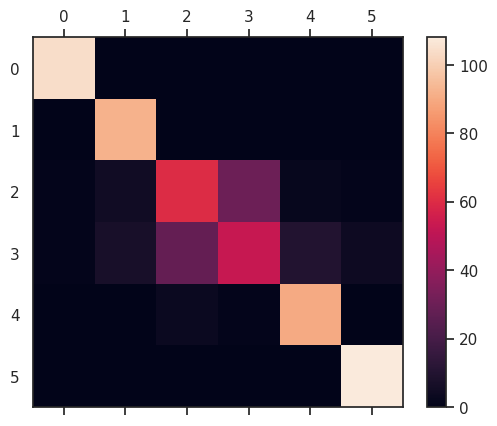

In [ ]:
fig,ax = plt.subplots()
cax = ax.matshow(cm)

# Add colorbar
plt.colorbar(cax)


In [ ]:
norm = MinMaxScaler()
X_train_norm =norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)
model_normdata= KNeighborsClassifier(n_neighbors=2,weights='distance')
model_normdata.fit(X_train_norm,y_train)
model_normdata.score(X_test_norm,y_test)

0.7433333333333333

Here, scaling reducing accuracy with minmaxscaler.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
model1 = LogisticRegression(max_iter=7000)
model1.fit(X_train,y_train)

model1_pred = model1.predict(X_test)
model1_accuracy = accuracy_score(y_test,model1_pred)
model1_accuracy

0.5483333333333333

In [ ]:
model2 = SVC(kernel='rbf')#gamma='scale'
model2.fit(X_train,y_train)
model2_pred = model2.predict(X_test)
model2_accuracy = accuracy_score(y_test,model2_pred)
model2_accuracy

0.4083333333333333

In [ ]:
y_train_mapped=[x-3 for x in y_train]
y_test_mapped=[x-3 for x in y_test]
common = set(y_train_mapped).intersection(set(y_test_mapped))
common

{0, 1, 2, 3, 4, 5}

In [ ]:
model3 = XGBClassifier()
model3.fit(X_train,y_train_mapped)
model3_pred = model3.predict(X_test)
model3_accuracy = accuracy_score(y_test_mapped,model3_pred)
model3_accuracy

0.8783333333333333